In [123]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [124]:
iris_df = pd.read_csv("Iris.csv")

In [125]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [126]:
iris_df.shape

(150, 6)

In [127]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**There are no null values in datasets**

In [128]:
iris_df = iris_df.drop(['Id'], axis = 1)

In [129]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [130]:
iris_df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**Three unique species are there :** 'Iris-setosa',  'Iris-versicolor',  'Iris-virginica'

In [131]:
iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

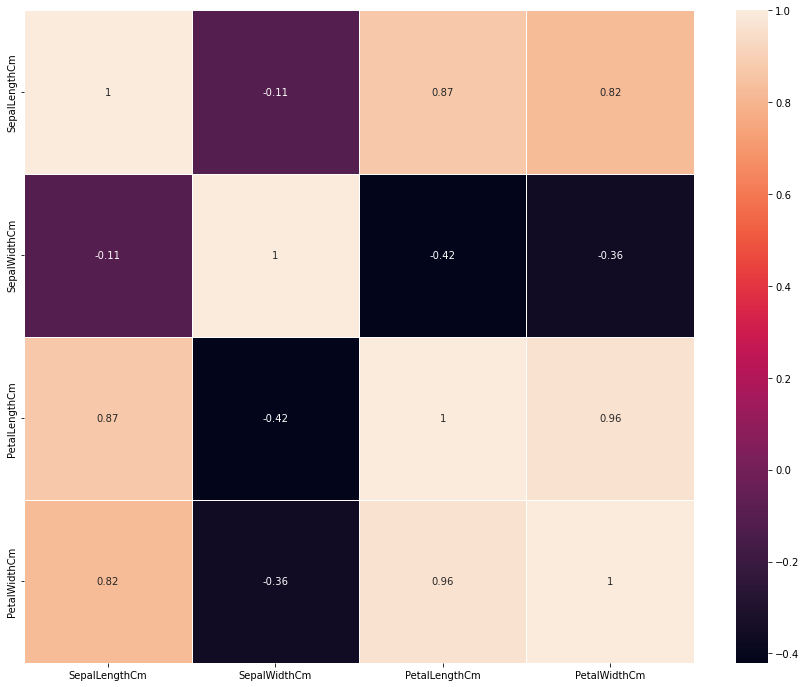

In [132]:
fig = plt.figure(figsize = (15, 12))
sns.heatmap(iris_df.corr(), linewidths = 1, annot = True)

# Finding clusters using ELBOW METHOD

In [133]:
# Import Scikit-Learn libraries :
from sklearn.cluster import KMeans

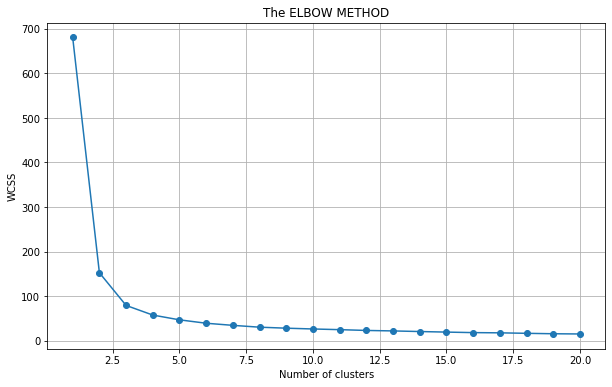

In [134]:
# Finding the optimum number of clusters for k-means classification :

X = iris_df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph : 
plt.figure(figsize = (10, 6))
plt.plot(range(1, 21), wcss, marker = 'o')
plt.title('The ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.grid()
plt.show()

In [135]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

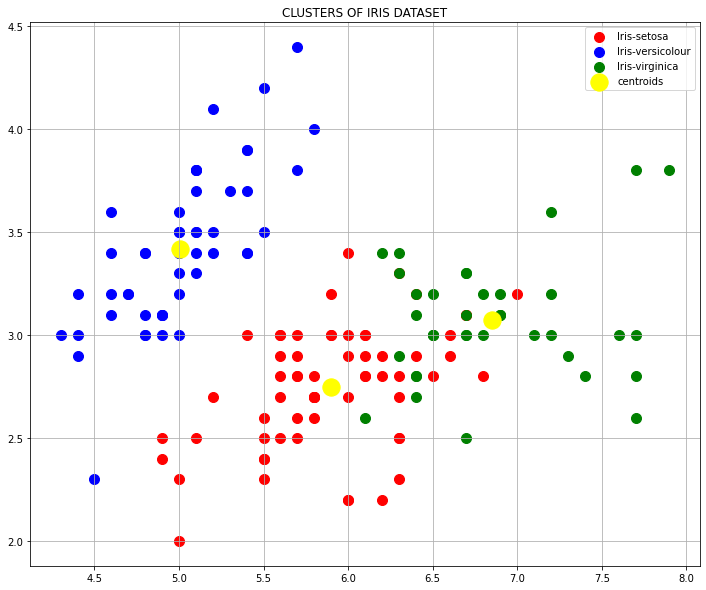

In [136]:
# Applying kmeans to the dataset / Creating the kmeans classifier : 

plt.figure(figsize=(12,10))

plt.scatter(X[y_kmeans == 0, 0],  X[y_kmeans == 0, 1], s= 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0],  X[y_kmeans == 1, 1], s= 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0],  X[y_kmeans == 2, 1], s= 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 300, c = 'yellow', label = 'centroids')
plt.title('CLUSTERS OF IRIS DATASET')
plt.grid()
plt.legend()
plt.show()